## Image Opening Morphology
### Image opening means Erosion followed by Dilation

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
img_gray = plt.imread('/home/thura/Desktop/computer-vision-and-DL/CV-course1/5 - Binary Morphology/images/albert-einstein-gray.jpg')
img_binary = plt.imread('/home/thura/Desktop/computer-vision-and-DL/CV-course1/5 - Binary Morphology/images/j.png')

In [3]:
img_binary.dtype

dtype('float32')

In [4]:
img_bool = np.array(img_binary[:, :, 0], dtype=np.bool)

/home/thura/Desktop/computer-vision-and-DL/cv-env/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.


In [5]:
img_bool.dtype

dtype('bool')

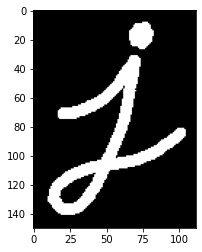

In [7]:
plt.imshow(img_bool, cmap='gray')

In [8]:
img_bool.shape

(150, 112)

In [9]:
N = np.random.rand(img_bool.shape[0], img_bool.shape[1])

In [11]:
N

array([[5.26082494e-01, 2.45120308e-01, 6.89912660e-01, ...,
        4.23736554e-01, 3.29147999e-01, 2.16237747e-01],
       [1.88242376e-01, 8.71701357e-04, 6.42846851e-01, ...,
        7.51002986e-01, 7.54914865e-01, 5.89266450e-01],
       [8.45731839e-01, 5.04482268e-01, 8.13181338e-01, ...,
        7.27085173e-01, 2.76367736e-01, 4.54214958e-01],
       ...,
       [2.33379811e-01, 6.85925616e-01, 1.07226063e-01, ...,
        1.79107656e-01, 9.10492325e-01, 4.44365815e-01],
       [4.00636702e-01, 8.00677804e-01, 9.09056626e-01, ...,
        3.58445292e-01, 6.50643553e-01, 7.14903952e-01],
       [6.14049828e-01, 7.29707394e-01, 3.73906160e-01, ...,
        7.00913787e-01, 3.11924996e-01, 4.34632918e-01]])

In [15]:
N_binary = N > 0.98

In [16]:
N_binary

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

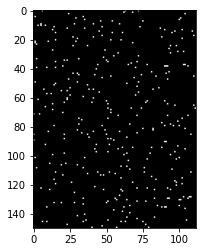

In [17]:
plt.imshow(N_binary, cmap='gray')

In [18]:
img_N = img_bool | N_binary

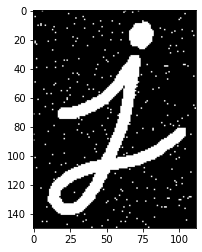

In [19]:
plt.imshow(img_N, cmap='gray')

In [20]:
K_rect = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))
K_elip = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
K_cross = cv2.getStructuringElement(cv2.MORPH_CROSS, (5, 5))

In [26]:
Open_rect = cv2.morphologyEx(np.float32(img_N), cv2.MORPH_OPEN, K_rect)

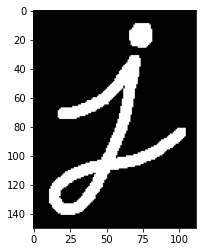

In [27]:
plt.imshow(Open_rect, cmap='gray')

#### Proof: Opening img - Erosion followed by Dilation

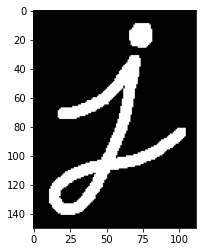

In [29]:
E_rect = cv2.erode(np.float32(img_N), K_rect)
OpenImg_rect = cv2.dilate(E_rect, K_rect)
plt.imshow(OpenImg_rect, cmap='gray')

## Image Closing Morphology
### Image closing means Dilation followed by Erosion

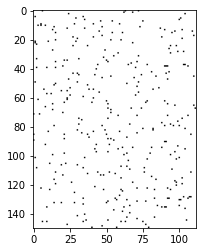

In [31]:
N_binary = N < 0.98

plt.imshow(N_binary, cmap='gray')

In [32]:
img_H = img_bool & N_binary

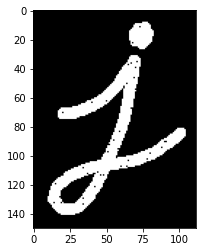

In [33]:
plt.imshow(img_H, cmap='gray')

In [36]:
Close_rect = cv2.morphologyEx(np.float32(img_H), cv2.MORPH_CLOSE, K_rect)

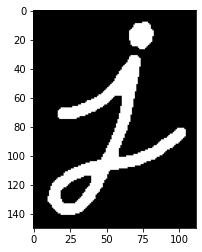

In [37]:
plt.imshow(Close_rect, cmap='gray')

#### Proof: Closing img - Dilation followed by Erosion

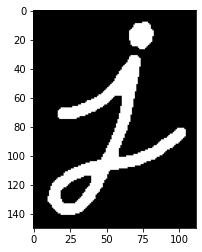

In [42]:
D_rect = cv2.dilate(np.float32(img_H), K_rect)
CloseImg_rect = cv2.erode(D_rect, K_rect)
plt.imshow(CloseImg_rect, cmap='gray')

## Image Gradient Morphology
### Dilation - Erosion

In [43]:
img_Gradient = cv2.morphologyEx(Close_rect, cv2.MORPH_GRADIENT, K_rect)

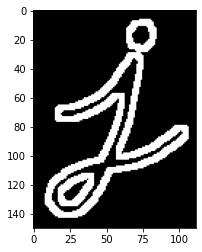

In [44]:
plt.imshow(img_Gradient, cmap='gray')

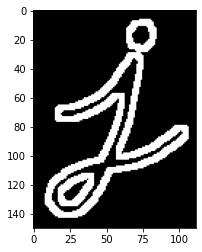

In [46]:
imgDilate = cv2.dilate(np.float32(Close_rect), K_rect)
imgErode = cv2.erode(np.float32(Close_rect), K_rect)
imgGradient = imgDilate - imgErode

plt.imshow(imgGradient, cmap='gray')

## Top Hat
### Input - Opening

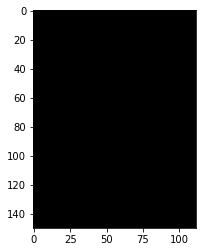

In [56]:
TH_r = cv2.morphologyEx(D_rect, cv2.MORPH_TOPHAT, K_rect)

plt.imshow(TH_r, cmap='gray')

## Black Hat
### Closing - Input

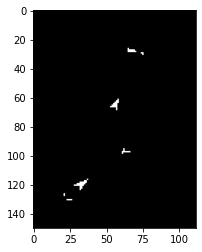

In [57]:
BH_r = cv2.morphologyEx(D_rect, cv2.MORPH_BLACKHAT, K_rect)

plt.imshow(BH_r, cmap='gray')